In [370]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
import plotly.express as px

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

%matplotlib inline

In [371]:
neighberhood_poverty = pd.read_csv(r"C:\Users\lisan\Downloads\NYC EH Data Portal - Neighborhood poverty (full).csv",thousands = ",")
evictions = pd.read_csv(r"C:\Users\lisan\Downloads\NYC EH Data Portal - Evictions (court-ordered) (full).csv",thousands = ",")
unemployment = pd.read_csv (r"C:\Users\lisan\Downloads\NYC EH Data Portal - Unemployment (full).csv",thousands = ",")

In [372]:
neighberhood_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       3868 non-null   object 
 1   GeoType    3868 non-null   object 
 2   GeoID      3868 non-null   int64  
 3   GeoRank    3868 non-null   int64  
 4   Geography  3868 non-null   object 
 5   Number     3868 non-null   int64  
 6   Percent    3868 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 211.7+ KB


In [373]:
evictions.head()

,Time,GeoType,GeoID,GeoRank,Geography,"Estimated annual rate per 10,000 homes",Number
0,2020,NTA2010,501,8,Claremont-Bathgate,28.6,34
1,2020,NTA2010,503,8,Eastchester-Edenwald-Baychester,18.8,22
2,2020,NTA2010,505,8,Bedford Park-Fordham North,20.7,45
3,2020,NTA2010,506,8,Belmont,29.6,30
4,2020,NTA2010,507,8,Bronxdale,21.3,24


In [374]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       3868 non-null   object 
 1   GeoType    3868 non-null   object 
 2   GeoID      3868 non-null   int64  
 3   GeoRank    3868 non-null   int64  
 4   Geography  3868 non-null   object 
 5   Number     3868 non-null   int64  
 6   Percent    3868 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 211.7+ KB


In [375]:
poverty_unemployment = neighberhood_poverty.merge(unemployment, on = ["GeoID", "Time","GeoType"], suffixes=("_neighberhood_poverty", "_unemployment"))

In [376]:
poverty_unemployment.head(100)

,Time,GeoType,GeoID,GeoRank_neighberhood_poverty,Geography_neighberhood_poverty,Number_neighberhood_poverty,Percent_neighberhood_poverty,GeoRank_unemployment,Geography_unemployment,Number_unemployment,Percent_unemployment
0,2017-21,NTA2020,50101,9,Mott Haven-Port Morris,23752,43.7,9,Mott Haven-Port Morris,2423,11.6
1,2017-21,NTA2020,50102,9,Melrose,17284,40.7,9,Melrose,2291,13.3
2,2017-21,NTA2020,50201,9,Hunts Point,4696,34.3,9,Hunts Point,1026,16.3
3,2017-21,NTA2020,50202,9,Longwood,12751,32.0,9,Longwood,2705,14.7
4,2017-21,NTA2020,50301,9,Morrisania,12615,35.7,9,Morrisania,2287,14.5
...,...,...,...,...,...,...,...,...,...,...,...
95,2017-21,NTA2020,610301,9,Chinatown-Two Bridges,13389,32.4,9,Chinatown-Two Bridges,1892,11.1
96,2017-21,NTA2020,610302,9,Lower East Side,11082,24.9,9,Lower East Side,1259,5.5
97,2017-21,NTA2020,610303,9,East Village,15864,24.3,9,East Village,2257,5.5
98,2017-21,NTA2020,610401,9,Chelsea-Hudson Yards,7121,11.5,9,Chelsea-Hudson Yards,1890,4.4


In [377]:
time_sort = poverty_unemployment.loc[poverty_unemployment['Time'] == '2017-21']
geo_sort = poverty_unemployment.loc[poverty_unemployment['GeoType'] == 'Borough']
combined_selection = time_sort.loc[time_sort.index.isin(geo_sort.index)]

In [378]:
combined_selection = combined_selection.reset_index(drop=True)
combined_selection.index = combined_selection.index + 1
combined_selection = combined_selection.loc[:, ['Time','Geography_neighberhood_poverty','Percent_neighberhood_poverty', 'Number_unemployment']].rename(columns={'Geography_neighberhood_poverty': 'Borough'})
combined_selection

,Time,Borough,Percent_neighberhood_poverty,Number_unemployment
1,2017-21,Bronx,26.5,75431
2,2017-21,Brooklyn,18.8,97387
3,2017-21,Manhattan,15.6,64396
4,2017-21,Queens,11.4,87222
5,2017-21,Staten Island,10.3,12957


In [393]:
time_sort2= poverty_unemployment.loc[poverty_unemployment['Time'] == '2017-21']
geo_sort2 = poverty_unemployment.loc[poverty_unemployment['GeoType'] != 'Borough']
geo_sort2 = geo_sort2.loc[poverty_unemployment['GeoType'] != 'Citywide']
combined_selection2 = time_sort2.loc[time_sort2.index.isin(geo_sort2.index)]
combined_selection2

,Time,GeoType,GeoID,GeoRank_neighberhood_poverty,Geography_neighberhood_poverty,Number_neighberhood_poverty,Percent_neighberhood_poverty,GeoRank_unemployment,Geography_unemployment,Number_unemployment,Percent_unemployment
0,2017-21,NTA2020,50101,9,Mott Haven-Port Morris,23752,43.7,9,Mott Haven-Port Morris,2423,11.6
1,2017-21,NTA2020,50102,9,Melrose,17284,40.7,9,Melrose,2291,13.3
2,2017-21,NTA2020,50201,9,Hunts Point,4696,34.3,9,Hunts Point,1026,16.3
3,2017-21,NTA2020,50202,9,Longwood,12751,32.0,9,Longwood,2705,14.7
4,2017-21,NTA2020,50301,9,Morrisania,12615,35.7,9,Morrisania,2287,14.5
...,...,...,...,...,...,...,...,...,...,...,...
348,2017-21,UHF42,410,4,Rockaways,23622,18.0,4,Rockaways,5431,9.1
349,2017-21,UHF42,501,4,Port Richmond,12098,17.0,4,Port Richmond,1921,5.7
350,2017-21,UHF42,502,4,Stapleton - St. George,16179,13.0,4,Stapleton - St. George,3797,6.2
351,2017-21,UHF42,503,4,Willowbrook,8652,9.3,4,Willowbrook,2459,5.5


In [394]:

combined_selection2 = combined_selection2.loc[1:20, ['Time','Geography_neighberhood_poverty','Number_neighberhood_poverty', 'Number_unemployment']].sort_values(by=("Number_unemployment"), ascending=False)[0:20]
combined_selection2 = combined_selection2.reset_index(drop=True)
combined_selection2.index = combined_selection2.index + 1
combined_selection2

,Time,Geography_neighberhood_poverty,Number_neighberhood_poverty,Number_unemployment
1,2017-21,Mount Eden-Claremont (West),16703,3769
2,2017-21,Bedford Park,14100,3629
3,2017-21,University Heights (South)-Morris Heights,18886,3520
4,2017-21,Concourse-Concourse Village,21730,3205
5,2017-21,University Heights (North)-Fordham,11856,3080
6,2017-21,Mount Hope,14696,2804
7,2017-21,Longwood,12751,2705
8,2017-21,Belmont,12919,2399
9,2017-21,Fordham Heights,11171,2347
10,2017-21,Melrose,17284,2291


In [400]:
df = px.data.iris()
fig = px.scatter(combined_selection2, x="Number_neighberhood_poverty", y="Number_unemployment", color="Geography_neighberhood_poverty",
                 size='Number_unemployment', hover_data=['Number_neighberhood_poverty'])
fig.update_layout(
    xaxis_title="Number Of People In Poverty",
    yaxis_title="Number Of Unemployed People",
    legend_title="Neighberhoods"
)
fig.show()

In [381]:
num_unemployment = unemployment.loc[1:10, ['Geography','Number']].sort_values(by=("Number"), ascending=False)[0:10]
num_unemployment = num_unemployment.reset_index(drop=True)
num_unemployment.index = num_unemployment.index + 1
num_unemployment

,Geography,Number
1,Mount Eden-Claremont (West),3769
2,University Heights (South)-Morris Heights,3520
3,Concourse-Concourse Village,3205
4,Longwood,2705
5,Melrose,2291
6,Morrisania,2287
7,Highbridge,1836
8,Claremont Village-Claremont (East),1390
9,Crotona Park East,1286
10,Hunts Point,1026


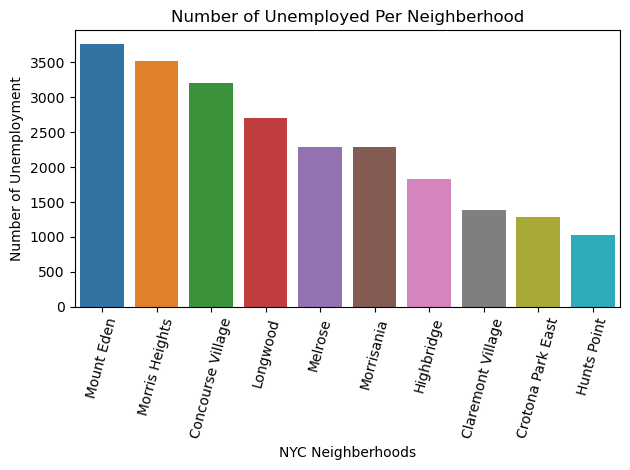

In [382]:
g= sns.barplot(data=num_unemployment, x="Geography", y="Number")

# Get the x-axis tick labels
xtick_labels = [label.get_text() for label in g.get_xticklabels()]

# Define new x-axis labels
new_xtick_labels = ['Mount Eden', 'Morris Heights', 'Concourse Village', 'Longwood', 'Melrose','Morrisania',
                    'Highbridge', 'Claremont Village', 'Crotona Park East', 'Hunts Point']

# Set the new x-axis tick labels
g.set_xticklabels(new_xtick_labels)

plt.xticks(rotation=75)

plt.title("Number of Unemployed Per Neighberhood")
plt.xlabel('NYC Neighberhoods')
plt.ylabel('Number of Unemployment')

plt.tight_layout()

In [383]:
neighberhood_poverty.head()

,Time,GeoType,GeoID,GeoRank,Geography,Number,Percent
0,2017-21,NTA2020,50101,9,Mott Haven-Port Morris,23752,43.7
1,2017-21,NTA2020,50102,9,Melrose,17284,40.7
2,2017-21,NTA2020,50201,9,Hunts Point,4696,34.3
3,2017-21,NTA2020,50202,9,Longwood,12751,32.0
4,2017-21,NTA2020,50301,9,Morrisania,12615,35.7


In [384]:
sorted_poverty_percentage = neighberhood_poverty.loc[1:7, ['Geography','Number', 'Percent']].sort_values(by=("Percent"), ascending=False)[0:10]
sorted_poverty_percentage = sorted_poverty_percentage.reset_index(drop=True)
sorted_poverty_percentage.index = sorted_poverty_percentage.index + 1
sorted_poverty_percentage

,Geography,Number,Percent
1,Claremont Village-Claremont (East),10386,43.2
2,Melrose,17284,40.7
3,Morrisania,12615,35.7
4,Hunts Point,4696,34.3
5,Longwood,12751,32.0
6,Concourse-Concourse Village,21730,31.9
7,Crotona Park East,8519,29.4


In [385]:
sorted_poverty_percentage['Y'] = [1]*len(sorted_poverty_percentage)
list_x = list(range(0,len(sorted_poverty_percentage)))
sorted_poverty_percentage['X'] = list_x
sorted_poverty_percentage

,Geography,Number,Percent,Y,X
1,Claremont Village-Claremont (East),10386,43.2,1,0
2,Melrose,17284,40.7,1,1
3,Morrisania,12615,35.7,1,2
4,Hunts Point,4696,34.3,1,3
5,Longwood,12751,32.0,1,4
6,Concourse-Concourse Village,21730,31.9,1,5
7,Crotona Park East,8519,29.4,1,6


In [386]:
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(sorted_poverty_percentage.Geography,
                                                            sorted_poverty_percentage.Number,
                                                            sorted_poverty_percentage.Percent)]


fig = px.scatter(sorted_poverty_percentage, x='X', y='Y',
                 color='Geography',
                 size='Percent', text=label, size_max=90
                )
fig.update_layout(width=1100, height=320,
                  margin = dict(t=50, l=0, r=0, b=0),
                  showlegend=False
                 )

fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

In [399]:
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(sorted_poverty_percentage.Geography,
                                                            sorted_poverty_percentage.Number,
                                                            sorted_poverty_percentage.Percent)]


fig = px.scatter(sorted_poverty_percentage, x='X', y='Y',
                 color='Geography',
                 size='Number', text=label, size_max=90
                )
fig.update_layout(width=1090, height=320,
                  margin = dict(t=50, l=0, r=0, b=0),
                  showlegend=False
                 )

fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()